In [1]:
from Prepare_Data import *
from Models import *
from Test import *
import os 
if os.path.isdir("scalers")==False:
    os.mkdir("scalers")

Using TensorFlow backend.


In [2]:
modelNumber=1
# 1: Basic LSTM Model 
# 2: Input Features first goes throush encoder, Then given to LSTM. 
# 3: Image CNN LSTM
features=2
# features= 0:No Features,1:Support Points,2:ShapeContext,3:AutoEncoder,4:Image
FeatureSize=110
# FeatureSize= No Feature:0,Support Points:4, ShapeContext:110,420,1640,AutoEncoder:256,512,1024 Image:(128,128,1)


In [3]:
## Model Parameters:
seq_length=15
n_neurons=128

In [4]:
if modelNumber==1:
    model = model_type_1(n_neurons,seq_length, FeatureSize+6)
    model.load_weights('models/m_'+str(modelNumber)+'_f'+str(features)+'_fs'+str(FeatureSize)+'.h5')
elif modelNumber==2:
    model = model_type_2(n_neurons,seq_length, FeatureSize+6)
    model.load_weights('models/m_'+str(modelNumber)+'_f'+str(features)+'_fs'+str(FeatureSize)+'.h5')
elif modelNumber==3:
    model = model_type_3(n_neurons,seq_length, FeatureSize)
    model.load_weights('models/m_'+str(modelNumber)+'_f'+str(features)+'.h5')


# Test

In [5]:
test_error,test_error_std,real_trajectories,predicted_trajectories=test_model(modelNumber,features,FeatureSize,seq_length,model)

Total XYZ MSE Error Mean=5.32 Std=4.60



# Visualization

Trajectory: 1724


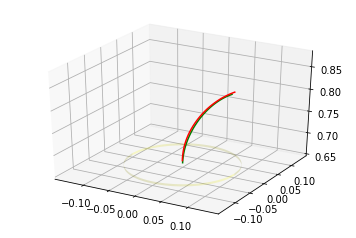

Trajectory: 1615


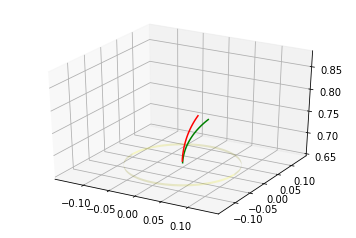

Trajectory: 1569


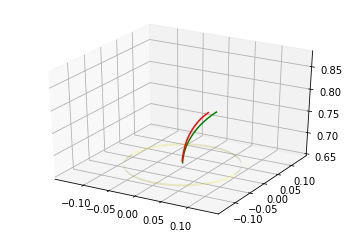

Trajectory: 1655


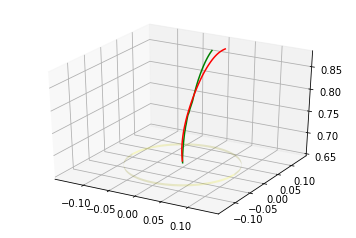

Trajectory: 1525


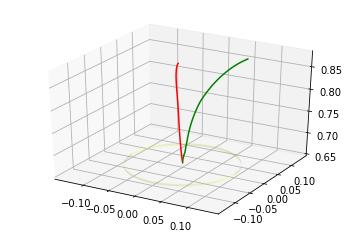

Trajectory: 1524


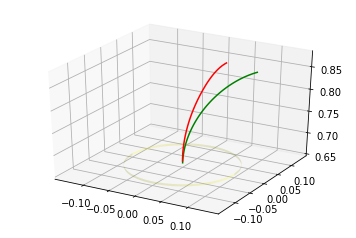

Trajectory: 1715


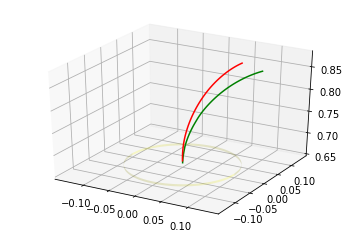

Trajectory: 1601


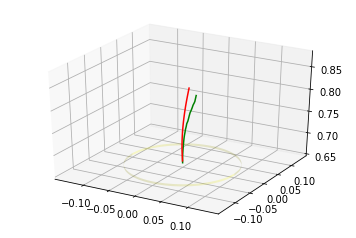

Trajectory: 1641


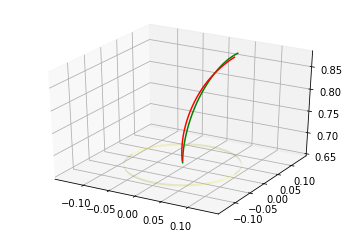

Trajectory: 1644


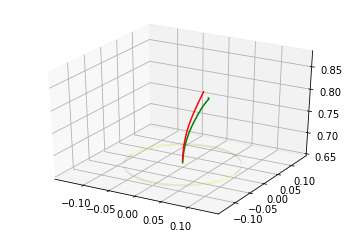

In [6]:
r = 0.1
x = np.linspace(r, -r, 100)
z = np.linspace(0.650, 0.655, 100)
Xc, Zc = np.meshgrid(x, z)
Yc = np.sqrt(r**2 - Xc**2)

rstride = 200
cstride = 1

for i in np.random.permutation(250)[:10]:
    print('Trajectory: ' + str(1500 + i))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_zlim(0.65, 0.88)
    ax.set_autoscalez_on(False)
    ax.set_xlim(-0.15, 0.15)
    ax.set_autoscalex_on(False)
    ax.set_ylim(-0.15, 0.15)
    ax.set_autoscaley_on(False)
    ax.plot_surface(
    Xc, Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride, color='yellow')
    ax.plot_surface(
    Xc, -Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride, color='yellow')

    ax.plot(real_trajectories[i][:, 0], real_trajectories[i][:, 1], real_trajectories[i][:, 2],color='green')
    ax.plot(predicted_trajectories[i][1:, 0], predicted_trajectories[i][1:, 1], predicted_trajectories[i][1:, 2],color='red')
    plt.show()